# Titanic Project
using Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pwd

'C:\\Users\\User\\Documents\\Python_EDA'

In [4]:
train=pd.read_csv('titanic_train.csv')

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S


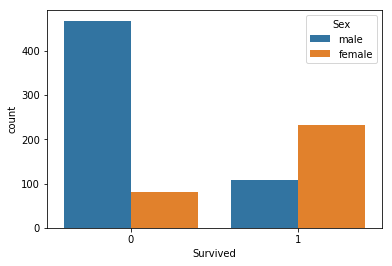

In [8]:
sns.countplot(x='Survived',hue='Sex',data=train)

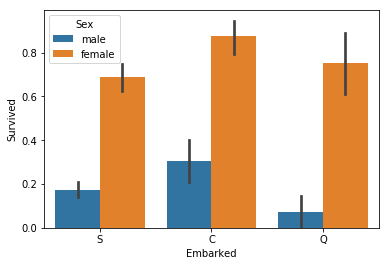

In [9]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train)

In [10]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#Categorical: Survived, Sex, and Embarked. #Ordinal: Pclass. #Continous: Age, Fare. #Discrete: SibSp, Parch

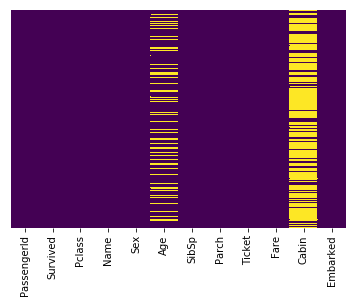

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')#is.null meansis the data is not availble in the rows
 #to show the null value gaps in the graph

#roughly 20% of the Age data missing.the proportion of age missing is likely small enough for reasonable replacement with some from of imputation.looking at the cabin column .it look like we are just missing too uch data to do someting at the basic level,
we will probably drop this later or change it to cabinknown:0 or 1

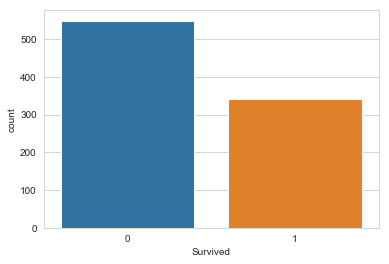

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)


#countplot: the count plot is used for what is the person who did not survived(0) above more than 550 people not survived,where as what is the person who has actually survive(1)around those 300 above are actually survived in the titanic acident.

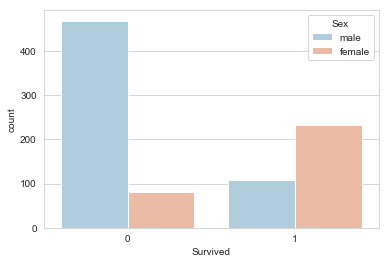

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

0:most of the males are not survived around 480 died,females are 90 are not survived,
those who are survived around 1:males are 100 and females are 220 are survived.consider 891 dataset

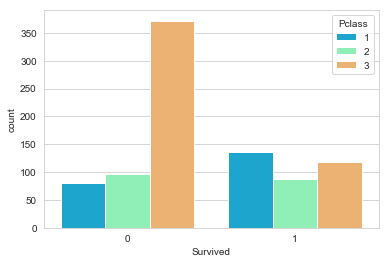

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

here Pclass is ordial there are 3 classes
1st class (rich)
2nd class (middle)
3rd class (poor)

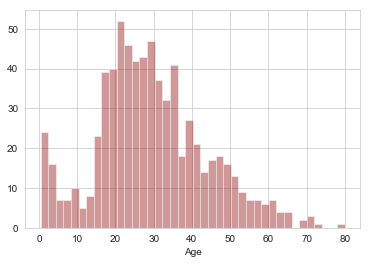

In [15]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

here iam using sns-seaborn for visualization
this graphs will show the howmuch age group people are travel in the Titanic ship,mostly 20 to 30 age group of people in the ship.
kde-kernaldensiyestimation is false in the above code
it is a bell curve and it forms a normal distribution

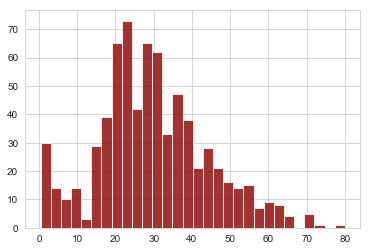

In [16]:
train['Age'].hist(bins=30,color='darkred',alpha=0.8)

here iam using matplotlib for visuals

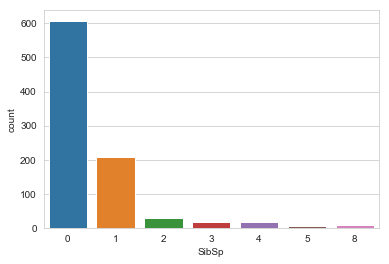

In [17]:
sns.countplot(x='SibSp',data=train)

0 means maximum people didnt have any sibling or spouse,200 mems have 1 sib or spouse like that,whereas 3 it maybe 2 siblings and spouse.

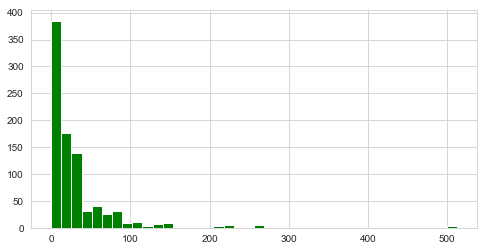

In [18]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# DATA CLEANING: 
is nothing but how I remove the null values
we want to fill missing AGE data instead of just dropping the missing age data rows.one way to do this is filling in the mean age of all the passengers (imputation).however we can be smarter about this and check the average age by the passenger class

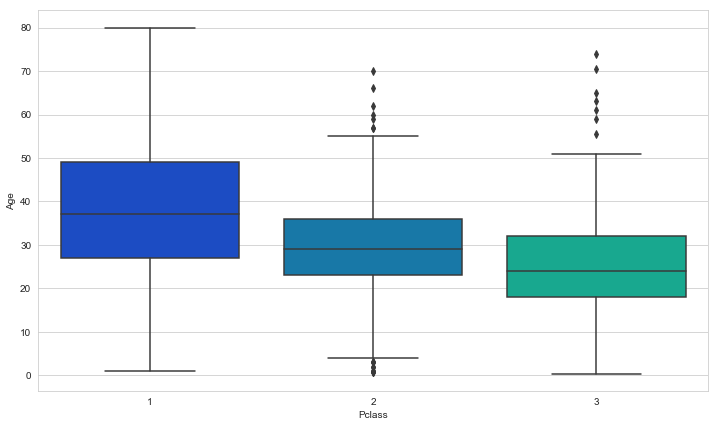

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train ,palette='winter')

we can see whether passenger is the higher classes tend to be older which make sense well use these average age values to be imputed based Pclass for age

In [25]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

now apply that application

In [27]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

# now lets check that heat map again

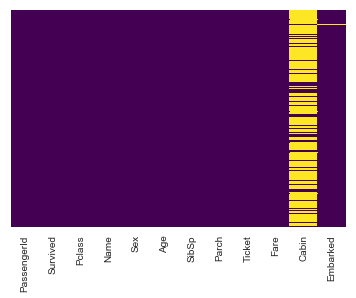

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

great lets go and drop the cabin,because soo null vaules,column and row in embarked that NaN

In [31]:
train.drop('Cabin',axis=1,inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
train.dropna(inplace=True)

# converting categorical feautures
we will need to convert categorical feautures to dummy variable using Pandas! otherwise our machinelearning alorithm wont be able to directly take in those feautures as inputs

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [35]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


drop_first=true--->it removes the 1st columns

In [36]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

the above row is drop the few columns in the table

In [38]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
train=pd.concat([train,sex,embark],axis=1)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


soo great,hehe our data is ready for the MODEL

# Building a Logistic Regression Model

lets start splitting our data into a training set and test set(there is another # test.csv file that you play around with in case you want to use all this data for training)

# Train Test split

In [45]:
train.drop('Survived',axis=1).head()# now we are drop the survive column

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [46]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix



##########################################################################################################
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn


from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
################################################################################################################

In [81]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),
                                               train['Survived'],test_size=0.30,
                                               random_state=101)
                                               
                                        

In [82]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
predictions=logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix #understand purpose that's i rewrite again

In [85]:
accuracy=confusion_matrix(y_test,predictions)

In [86]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score  #understand purpose that's i rewrite again

In [89]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [90]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)